In [248]:
#CI Project: Face recognition using Eigenfaces
from sklearn import datasets
#Dataset: Face images dataset from AT&T taken from https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html
faces = datasets.fetch_olivetti_faces()
#faces.data = ravelled face image, faces.image = original image, faces.target = labels of each image 
print(faces.data.shape, faces.images.shape,faces.target.shape) 

(400, 4096) (400, 64, 64) (400,)


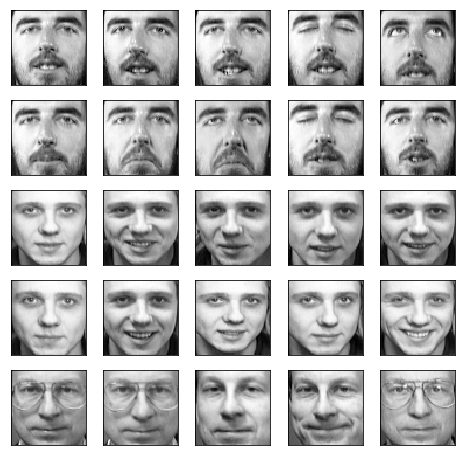

In [249]:
from matplotlib import pyplot as plt
#Plotting samples from the dataset (Note that the same subject has images with and without glasses)
fig = plt.figure(figsize=(8, 8))
j=0
for i in range(100,125):
    ax = fig.add_subplot(5, 5, j+1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.gray)
    j+=1

In [250]:
#Train-test splitting to test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target,test_size=0.25)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [251]:
#Applying PCA for feature extraction (Here, we take 150 components in the PCA model)
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

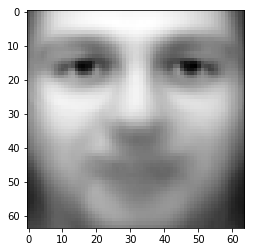

In [252]:
#Plotting the "mean face"
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.gray)

In [253]:
#Each PCA component is composed of the original 4096 features
print(pca.components_.shape)

(150, 4096)


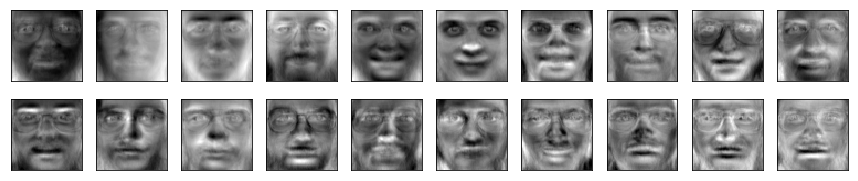

In [255]:
fig = plt.figure(figsize=(15, 3))
#Plotting the first 20 PCA components out of 150 in total 
#Here 100% variance is taken so as not to compromise on model accuracy
for i in range(20):
    ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.gray)

In [256]:
#New train and test data after PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(300, 150)

In [257]:
X_test_pca.shape

(100, 150)

In [258]:
#Applying SVM classifier on data 
#Here, we take C=10 and gamma=0.001 (Trial and error)
from sklearn import svm
clf = svm.SVC(C = 10, gamma = 0.001)
clf.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

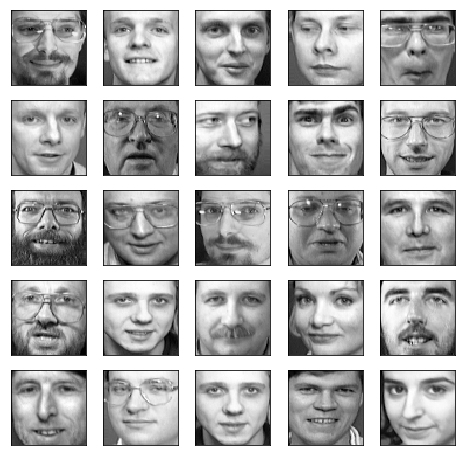

In [259]:
#Plotting sample images from test set
import numpy as np
fig = plt.figure(figsize=(8, 8))
j=0
for i in range(50,75):
    ax = fig.add_subplot(5, 5, j + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.gray)
    j+=1

In [260]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print('Accuracy: {:.3f}'.format(clf.score(X_test_pca, y_test)))

Accuracy: 0.970


In [261]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         5
          2       0.00      0.00      0.00         1
          3       1.00      1.00      1.00         1
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         3
          6       1.00      0.50      0.67         2
          7       1.00      1.00      1.00         3
          8       0.50      1.00      0.67         1
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         5
         11       1.00      1.00      1.00         3
         12       0.67      1.00      0.80         2
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         2
         15       1.00      1.00      1.00         1
         16       1.00      1.00      1.00         3
         17       1.00      1.00      1.00   

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(69,0.5,'Actual Labels')

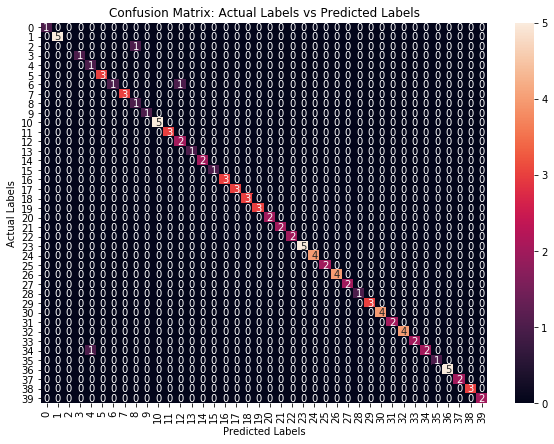

In [262]:
#Additional: Plotting Confusion Matrix as Heatmap
#Here, the heatmap may not always be 40 X 40 since the test data may not include images of all the 40 subjects
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = metrics.confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array, index = [i for i in range(0,len(array[0]))],
                  columns = [i for i in range(0,len(array[0]))])
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix: Actual Labels vs Predicted Labels")
sn.heatmap(df, xticklabels=1, yticklabels=1, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")